# DANIEL WATTS PROJECT - PYTHON POWERED MOVIE RECOMMENDATION ENGINE

There are many types of movie recommendation systems, my one will be using three types of filtering.

Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

Demographic Filtering- They offer general recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

Loading the data/Data preprocessing

MY FILE PATH IS DIFFERENT TO YOURS, PLEASE ENTER THE FILE NAME FOR THE CSV FILES FROM YOUR COMPUTER OR THE SYSTEM WILL NOT WORK

In [1]:
import pandas as pd 
import numpy as np 

dataframe1=pd.read_csv('/Users/danielwatts/Desktop/Uni/Year 3/Computing Project/archive (1)/tmdb_5000_credits.csv')
dataframe2=pd.read_csv('/Users/danielwatts/Desktop/Uni/Year 3/Computing Project/archive (1)/tmdb_5000_movies.csv')

This code conjoins the two datasets on the 'id' column

In [2]:
dataframe1.columns = ['id','tittle','cast','crew']
dataframe2= dataframe2.merge(dataframe1,on='id')

This line of code gives us a short preview of the data

In [3]:
dataframe2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


This line of code again gives us another little peak at the data

In [4]:
dataframe2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Part One - Demographic Filtering

For demographic filtering there are three metrics to be discovered.
* A metric to score or rate movie
* Calculating the score for every movie
* Sorting the scores and recommending the best rated movie to the users.

In order to ensure integrity I will be using a weighted method because it would be inaccurate to give a movie a high rating if it only has a small amount like 7 votes. Therefore I will be using IMDB's weighted rating (wr) which is as follows.

Weighted rating  (𝑊𝑅)=(𝑣/(𝑣+𝑚))𝑅+(𝑚/(𝑣+𝑚))𝐶
* R = Average rating of the movie
* m = Minimum votes required to be listed in the chart
* v = The number of votes for the movie
* C = Mean amount of votes

As v(vote_count) and R (vote_average) are already defined, The following code finds the value of C


In [5]:
C= dataframe2['vote_average'].mean()
C

6.092171559442011

This has showed us that the approximate mean for the movies is just over 6. Now we need to determine a suitable amount for M which is a minimum value for the movie to be considered. I will use the 85th percentile as the cutoff, meanining that for a movie to be considered, it must have more votes than at least 85% of the other movies in the list.

In [6]:
m= dataframe2['vote_count'].quantile(0.85)
m

1300.6999999999998

Now I can sift throught the movies and decide which ones qualify

In [7]:
QualifiedMovies = dataframe2.copy().loc[dataframe2['vote_count'] >= m]
QualifiedMovies.shape

(721, 23)

This calculates that there are 721 movies that qualify to be in the list, now I need to calculate the metric for each qualified movie. So I will call define a weighted rating function which will define a new score, from this I will calculate the value by applying this function to my DataFrame of qualified movie

In [8]:
def IMDB_Weighted_Rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

The code cell below creates a new value called score, which is the result of the IMDB weighted rating calculation

In [9]:
# Defining a new feature 'score' and calculate its value with `IMDB_Weighted_Rating`
QualifiedMovies['score'] = QualifiedMovies.apply(IMDB_Weighted_Rating, axis=1)

Now I am going to sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [10]:
#Sorting movies based on score calculated above
QualifiedMovies = QualifiedMovies.sort_values('score', ascending=False)

#Priningt the top 15 movies
QualifiedMovies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.170528
662,Fight Club,9413,8.3,8.031958
3232,Pulp Fiction,8428,8.3,8.004820
65,The Dark Knight,12002,8.2,7.993903
3337,The Godfather,5893,8.4,7.982719
96,Inception,13752,8.1,7.926504
809,Forrest Gump,7927,8.2,7.902889
95,Interstellar,10867,8.1,7.885368
329,The Lord of the Rings: The Return of the King,8064,8.1,7.821125
1990,The Empire Strikes Back,5879,8.2,7.818138


This is a basic implementation of a demographic based movie recommendation engine. This essentially finds the mean score and finds the most popular ones - very basic and doesn't take much attention to the finer points such as plot and content, which will come later

The graph below depicts the movies with the highest vote counts, from this we can see that, Inception, The Dark Night and Interstellar all make it into the most popular movies in terms of weighted rating which is interesting to see.

Text(0.5, 1.0, 'Highest Vote Counts')

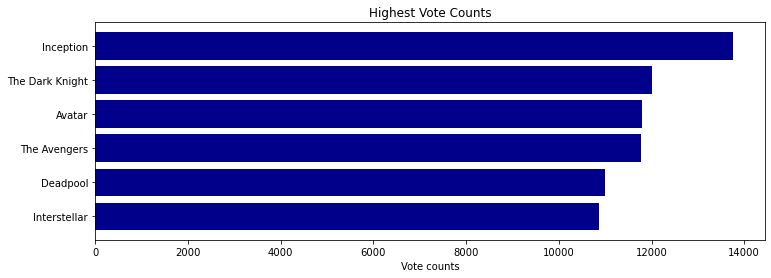

In [11]:
pop= dataframe2.sort_values('vote_count', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['vote_count'].head(6), align='center',
        color='darkblue')
plt.gca().invert_yaxis()
plt.xlabel("Vote counts")
plt.title("Highest Vote Counts")

# Part Two - Content Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended. The first part of this system will use a pairwise similarity score based on descriptions and compute a similiarity score which will then generate a reccomendation.

Pairwise similarity scores will be calculated for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset.

In [12]:
dataframe2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

I will now compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview

The following code was adapted from source:
https://www.kaggle.com/aligsaoud/different-recommendation-systems
Accessed 10/03/2021

In [13]:
#Importing TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer. Removing all english words such as 'the', 'a'
TermFrequency_IDF = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
dataframe2['overview'] = dataframe2['overview'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
TermFrequency_IDF_matrix = TermFrequency_IDF.fit_transform(dataframe2['overview'])

#Outputting the shape of TermFrequency_IDF_matrix
TermFrequency_IDF_matrix.shape

(4803, 20978)

It's interesting to see that there is over 20,000 words used to describe the 4803 movies in our dataset.

I will be using the cosine similarity rule that denotes similarities between two movies. The following code shows how the cosine similarity is computed, as you can see I make use of the sklearn library, which is absolutley critical for the content based filtering

In [14]:
# Importing linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_similarity = linear_kernel(TermFrequency_IDF_matrix, TermFrequency_IDF_matrix)

In [15]:
#Constructing a reverse map of indices and movie titles
indices = pd.Series(dataframe2.index, index=dataframe2['title']).drop_duplicates()

The following code was adapted from source:
https://www.kaggle.com/aligsaoud/different-recommendation-systems
Accessed 10/03/2021

In [16]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_similarity=cosine_similarity):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    Pairwise_similarity_scores = list(enumerate(cosine_similarity[idx]))

    # Sort the movies based on the similarity scores
    Pairwise_similarity_scores = sorted(Pairwise_similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    Pairwise_similarity_scores = Pairwise_similarity_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in Pairwise_similarity_scores]

    # Return the top 10 most similar movies
    return dataframe2['title'].iloc[movie_indices]

### Use this recommender to get films based from plot and descriptions

Users - Insert movie name into red quote marks, use full capitals and relevant spacing

In [17]:
get_recommendations('Star Wars')

1990                     The Empire Strikes Back
1490                          Return of the Jedi
833                                Shanghai Noon
1290                    Baahubali: The Beginning
2864                                   Arbitrage
2556                          The Princess Bride
410                                Mirror Mirror
2929                History of the World: Part I
1045    The Princess Diaries 2: Royal Engagement
2232                                 Topsy-Turvy
Name: title, dtype: object

Users - Insert movie name into red quote marks, use full capitals and relevant spacing

In [18]:
get_recommendations('The Departed')

877                            Black Mass
1394                        Donnie Brasco
3760                       The Jerky Boys
2639                         District B13
1847                           GoodFellas
4135      Gangster's Paradise: Jerusalema
1225                     Mickey Blue Eyes
538                               Hostage
3227      The Wind That Shakes the Barley
4098    Ghost Dog: The Way of the Samurai
Name: title, dtype: object

### Metadata recommender - Content based filter

I will now build a recommender system using key metadata such as top 3 actors, director and movie plot keywords

In [19]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    dataframe2[feature] = dataframe2[feature].apply(literal_eval)

The following code cell was adapted from source https://www.kaggle.com/rounakbanik/movie-recommender-systems
Accessed 12/03/2021

In [20]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

This code cell creates a get list function, essentially checking if more than 3 elements exist, if not then returning the entire list.

In [21]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

This code cell gets directors, casts, keywords, and genres that are in a suitable format

In [22]:
dataframe2['director'] = dataframe2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    dataframe2[feature] = dataframe2[feature].apply(get_list)

This code cell prints the new features of the dataframe that will be examined in the metadata soup

In [23]:
# Print the new Metadatafeatures of the first 3 films
dataframe2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next code cell converts the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Daniel of "Daniel Craig" and " Daniel Radcliffe" as the same.

In [24]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

The following is an example of data cleaning, as there is a lot of irrelevant fields which will just overcomplicate the calculations, I am notifying the system of whats important and highlighting this as clean data

In [25]:
# Apply clean_data function to my features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    dataframe2[feature] = dataframe2[feature].apply(clean_data)

The following cell creates my metadata soup which is a string that contains all metadata that I want to feed into the system.

In [26]:
def create_Metadata_Soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
dataframe2['soup'] = dataframe2.apply(create_Metadata_Soup, axis=1)

The next steps are the same as what I did with my plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because I do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [27]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(dataframe2['soup'])

The following cell is important as it defines my cosine similarity score, if we see my getrecommendations function then we can see that after the user input is "cosine_2" this is because we want to see the list of movies with the highest cosine similarity scores

In [28]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [29]:
# Reset index of our main DataFrame and construct reverse mapping as before
dataframe2 = dataframe2.reset_index()
indices = pd.Series(dataframe2.index, index=dataframe2['title'])

I can reuse my same get_recommendations function by passing the new cosine matrix as my second argument

### Use this recommender to get films based from key metadata

Users - Insert movie name into red quote marks, use full capitals and relevant spacing

In [30]:
get_recommendations('Avatar', cosine_sim2)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title, dtype: object

Users - Insert movie name into red quote marks, use full capitals and relevant spacing

In [31]:
get_recommendations('The Departed', cosine_sim2)

298     The Wolf of Wall Street
439              Shutter Island
1038            The Infiltrator
1170    The Talented Mr. Ripley
1209              The Rainmaker
1394              Donnie Brasco
1803             Blood and Wine
2440            Veronica Guerin
316           Gangs of New York
1644            Pride and Glory
Name: title, dtype: object

I have used these examples as these films both have Leonardo DiCaprio as a main actor, although the actor is the same for both films, we are presented with different recommendations based of the keywords we fed into our soup, which is why Titanic returns films like Romeo and Juliet while the Departed returns films such as shutter island.

#  Collaborative based Filtering

Furthered-User based filtering
This part of the system will recommend movies to a user that similar users have liked. The result will be a prediction of the movie rating that users will give the movie based on movies they've rated before, so the system will check what movies they have rated with the fields userID, movieID, rating and timestamp. We will then enter a movie id, then the system will predict a rating.

I will using the csv - ratings small.csv for this part

The following cell gets all the libraries and functions that I need for my system, this system really utilises libraries rather than create a lot of calculations from scratch as there is no need to do so and it is very time consuming. The libraries below are very useful and they come with a lot of packages that really help especially with this part of the system.

The following is original code

In [32]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
reader = Reader()
User_ratings = pd.read_csv('/Users/danielwatts/Desktop/Uni/Year 3/Computing Project/ratings_small.csv')
User_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


The next cell splits the data into 5 folds, this is a means of testing the data and we will see later why this is really important, the follwoing code cell splits the dataframe into k consecutive folds, each fold is then used once as a validation whilst the k-1 set fold forms the training set. This is an important part and is used very commonly in model testing. 

In [33]:
data = Dataset.load_from_df(User_ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x7f97e0299f90>

In [34]:
algo = SVD()

This segment of the code carries of the testing of the data, once run the code evaluates the data and then generates a RMSE score, the score means how accurate my predicted rating is and for a system like mine, we are aiming for a RMSE of 0-3 because this is quite a small dataset and system. If the dataset was a lot larger then we could hope for a RMSE of 0-10 but for my system I am aiming for a RMSE of 0-3. Although RMSE could rise to a 1000.
KEY - A good RMSE is as close to 0 as you can get.

In [35]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8897  0.8945  0.9017  0.8999  0.8971  0.8966  0.0043  
MAE (testset)     0.6844  0.6874  0.6937  0.6921  0.6925  0.6900  0.0035  
Fit time          4.68    4.24    4.74    4.17    4.53    4.47    0.23    
Test time         0.13    0.25    0.11    0.18    0.11    0.16    0.05    


{'test_rmse': array([0.88965663, 0.89448859, 0.90172307, 0.89993677, 0.89714102]),
 'test_mae': array([0.68437175, 0.68742825, 0.69370851, 0.6921075 , 0.69247186]),
 'fit_time': (4.67820405960083,
  4.242622137069702,
  4.74323296546936,
  4.1702961921691895,
  4.528465986251831),
 'test_time': (0.13209223747253418,
  0.25208306312561035,
  0.10961413383483887,
  0.18285894393920898,
  0.10958099365234375)}

In [36]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.90069567, 0.89081119, 0.88841989, 0.9062895 , 0.89693591]),
 'test_mae': array([0.69241267, 0.68493159, 0.68541174, 0.70031984, 0.68977561]),
 'fit_time': (4.389287233352661,
  4.142930269241333,
  4.148199796676636,
  4.141971826553345,
  4.172640085220337),
 'test_time': (0.19492578506469727,
  0.11064600944519043,
  0.1952669620513916,
  0.1125030517578125,
  0.19250011444091797)}

Ulitising the surprise library, I am building a trainset which can lead me to the predictions

In [37]:
trainset = data.build_full_trainset()
svd.fit(trainset)

The following code prints out movies that the user in question has rated, so the user will imput a movie where the integer is, this is the movie id of the user they want to see, so I have entered id - 45.

In [38]:
User_ratings[User_ratings['userId'] == 45]

,userId,movieId,rating,timestamp
7277,45,520,3.5,1140202251
7278,45,899,4.0,1140202396
7279,45,903,5.0,1140202299
7280,45,1199,4.0,1140202319
7281,45,1333,4.5,1140202390
7282,45,1639,3.0,1140202266
7283,45,1673,4.5,1140202294
7284,45,1748,4.5,1140202371
7285,45,2572,2.5,1140202408
7286,45,2692,4.5,1140202246


Users - Insert User ID into first space, then movie id, then number 3

In [39]:
svd.predict(45, 11, 3)

Prediction(uid=45, iid=11, r_ui=3, est=3.655803219830425, details={'was_impossible': False})

So for this example I have chosen someone with the userID of 45 and a film ID of 11, both completley random numbers, based on how other users with similar interests have rated this movie. So from the function we can see a prediction of 3.41, meanining that if user 45 watched movie 2938, there will likely be a rating of 3.41

# Some Data Analysis and Trends

In this part of my project I will be going into some in depth analysis of the dataset and trying to pull apart some trends that will help with my recommender system.

I will be creating a function which will allow me to find the minimum and maximum of values that the user can input. This function will serve as the basis of this part of the project.

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
reader = pd.read_csv('/Users/danielwatts/Desktop/Uni/Year 3/Computing Project/archive (1)/tmdb_5000_movies.csv')

In [42]:
#Creating a new column that will calcuate the profit a film has made 
reader['Profit'] = reader['revenue'] - reader['budget']

### Movies with highest profability

In [43]:
def find_minmax(x):
    min_index = reader[x].idxmin()
    high_index = reader[x].idxmax()
    high = pd.DataFrame(reader.loc[high_index,:])
    low = pd.DataFrame(reader.loc[min_index,:])
    
    #Printing the movie with the highest and lowest profits.
    print("Movie Which Has Highest "+ x + " : ",reader['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",reader['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#Calling the find_max function
find_minmax ('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Lone Ranger


,0,13
budget,237000000,255000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/the-lone-ranger/
id,19995,57201
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""..."
original_language,en,en
original_title,Avatar,The Lone Ranger
overview,"In the 22nd century, a paraplegic Marine is di...",The Texas Rangers chase down a gang of outlaws...
popularity,150.438,49.047
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."


We can now see that the film with the highest budget is Avatar which is represented in the first column followed by the lowest revenue movie which is 'Wild Card'

This graph depicts the top 10 highest revenue generating movies, this will be interesting to compare against ratings to see if we can get a correlation between revenue and ratings, this sounds obvious but its key to note that revenue is often generated by cinema sales which is before the view has seen the film for the first time. 

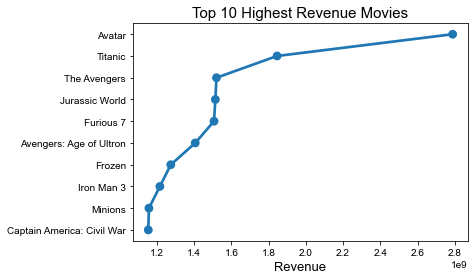

In [44]:
info = pd.DataFrame(reader['revenue'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")